### Stock Market Analysis and Prediction with Time Series Methods

##### This notebook explores time series data from the stock market, focusing on technology stocks like Apple, Amazon, Google, and Microsoft. We'll use yfinance to fetch stock information and visualize it using Seaborn and Matplotlib. Throughout the analysis, we'll delve into:

1. Tracking the change in stock price over time.
2. Calculating the daily return of each stock on average.
3. Computing the moving average of the stocks.
4. Determining the correlation between different stocks.
5. Assessing the risk associated with investing in a particular stock.
6. Attempting to predict future stock behavior using the Long Short Term Memory (LSTM) method, specifically predicting the closing price of Apple Inc.

We'll address these questions along the way to gain insights into the performance and behavior of the selected technology stocks.

To obtain the data, we'll utilize the yfinance library, which facilitates the retrieval of market data from Yahoo Finance. Yahoo Finance provides a wealth of financial market data and tools for analyzing investments. With yfinance, we can efficiently download market data in a threaded and Pythonic manner.

We'll use yfinance to fetch historical market data for our selected stocks, including Apple, Amazon, Google, and Microsoft. This data will serve as the foundation for our analysis, allowing us to explore trends, patterns, and relationships within the stock market.






### 1. change in price of the stock overtime
In this section, we'll explore the change in the stock price over time. We'll use pandas to request stock information and analyze fundamental attributes of the stock. This analysis will help us understand how the stock price has evolved over different time periods, allowing us to identify trends, fluctuations, and potential patterns in the stock's performance.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
# For time stamps
from datetime import datetime
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

C:\Users\hasan\AppData\Local\Temp\ipykernel_832\4169834227.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
yf.pdr_override()
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [4]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

C:\Users\hasan\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\hasan\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\hasan\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 

In [5]:
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-01-16,153.529999,154.990005,152.149994,153.160004,153.160004,41384600,AMAZON
2024-01-17,151.490005,152.149994,149.910004,151.710007,151.710007,34953400,AMAZON
2024-01-18,152.770004,153.779999,151.820007,153.500000,153.500000,37850200,AMAZON
2024-01-19,153.830002,155.759995,152.740005,155.339996,155.339996,51033700,AMAZON
2024-01-22,156.889999,157.050003,153.899994,154.779999,154.779999,43687500,AMAZON
2024-01-23,154.850006,156.210007,153.929993,156.020004,156.020004,37986000,AMAZON
2024-01-24,157.800003,158.509995,156.479996,156.869995,156.869995,48547300,AMAZON
2024-01-25,156.949997,158.509995,154.550003,157.750000,157.750000,43638600,AMAZON
2024-01-26,158.419998,160.720001,157.910004,159.119995,159.119995,51001100,AMAZON


Upon reviewing our data, we observe that it consists of numeric values, with dates serving as the index. Notably, weekends are absent from the records, indicating that the data includes only market trading days.

It's worth mentioning that employing globals() to set DataFrame names is a simplistic approach, though it's not the most elegant. Now that we have our data, let's proceed with basic data analysis to gain insights and verify its integrity.

#### Deep Statistics about the Data

The .describe() method generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution, excluding NaN values.

It analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output varies depending on the data provided. For a numeric dataset, .describe() provides statistics such as count, mean, standard deviation, minimum, maximum, and various percentiles.

This method is useful for quickly understanding the basic characteristics of the data, helping to identify outliers, understand the distribution of values, and assess the overall structure of the dataset.

In [6]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,176.138925,177.684940,174.869044,176.409283,176.036873,5.803284e+07
std,14.278436,14.067109,14.234112,14.100872,14.271450,1.726348e+07
min,142.699997,144.339996,141.320007,143.000000,142.205154,2.404830e+07
25%,166.755005,168.760002,165.659996,167.540001,166.863129,4.738880e+07
50%,177.380005,179.429993,176.509995,177.820007,177.496155,5.383360e+07
75%,188.739998,189.909996,187.540001,188.940002,188.688065,6.438910e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


Since weekends are excluded from the data, we have 255 records for one year. This means that the dataset includes only market trading days, reflecting the absence of data for weekends when the stock market is closed.

#### Information About the Data
.info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

In [7]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-01-30 to 2024-01-29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


#### Closing Price
The closing price represents the final price at which a stock is traded during the regular trading session. It serves as a key benchmark for investors to monitor the stock's performance over time. The closing price reflects the market's sentiment and the culmination of trading activity for the day. It is widely used by investors, analysts, and traders to assess trends, make investment decisions, and analyze the overall health of a stock.

C:\Users\hasan\AppData\Local\Temp\ipykernel_832\1787577337.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


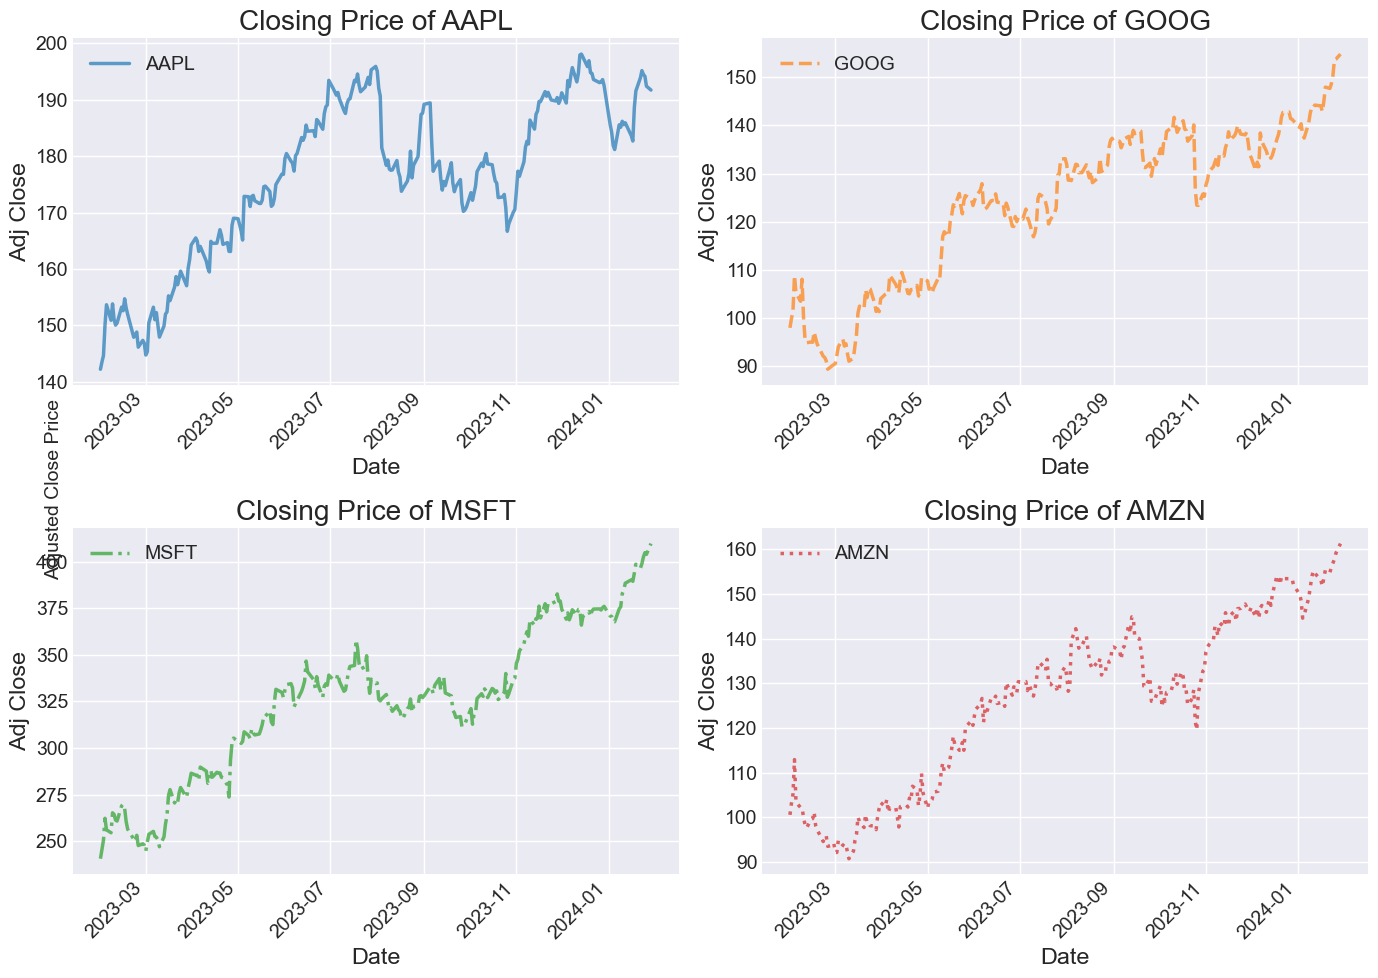

In [8]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the figure and adjust spacing
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Define colors and line styles
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
line_styles = ['-', '--', '-.', ':']

# Iterate over each company's data and plot
for i, (company, tech) in enumerate(zip(company_list, tech_list)):
    ax = axes[i // 2, i % 2]
    company['Adj Close'].plot(ax=ax, color=colors[i], linestyle=line_styles[i % 4], linewidth=2.5, alpha=0.7)
    ax.set_title(f"Closing Price of {tech}")
    ax.set_xlabel('Date')
    ax.set_ylabel('Adj Close')
    ax.tick_params(axis='x', rotation=45)
    ax.legend([tech], loc='upper left')

# Add common y-axis label
fig.text(0.04, 0.5, 'Adjusted Close Price', va='center', rotation='vertical', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


#### Volume of Sales
Volume refers to the quantity of an asset or security that is exchanged within a specific period, typically during a trading day. For example, stock trading volume indicates the number of shares of a security traded between its daily opening and closing prices. 

Trading volume, along with changes in volume over time, is a crucial factor for technical traders. It provides insights into market activity, liquidity, and investor sentiment. High trading volume often suggests increased interest and participation in a particular security, while low volume may indicate less market activity or investor caution. 

Monitoring trading volume can help traders identify trends, confirm price movements, and assess the strength of market trends or reversals. It's an essential metric used in technical analysis to make informed trading decisions.

C:\Users\hasan\AppData\Local\Temp\ipykernel_832\3131004939.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


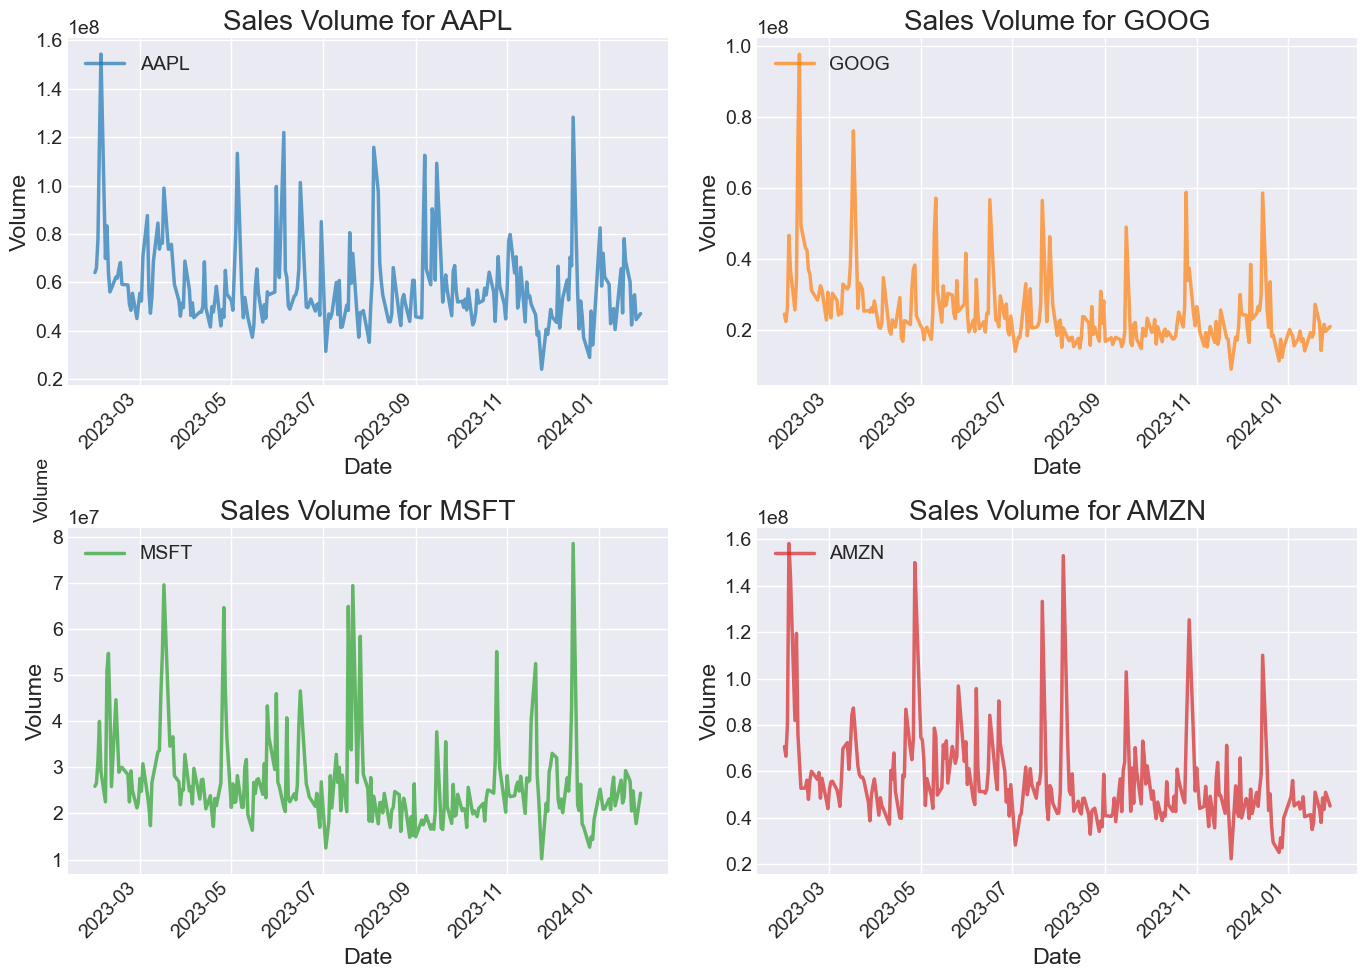

In [9]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the figure and adjust spacing
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Define colors for each company
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Plot the volume for each company
for i, (company, tech) in enumerate(zip(company_list, tech_list)):
    ax = axes[i // 2, i % 2]
    company['Volume'].plot(ax=ax, color=colors[i], linewidth=2.5, alpha=0.7)
    ax.set_title(f"Sales Volume for {tech}")
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    ax.tick_params(axis='x', rotation=45)
    ax.legend([tech], loc='upper left')

# Add common y-axis label
fig.text(0.04, 0.5, 'Volume', va='center', rotation='vertical', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


Now that we've reviewed the visualizations for the closing price and the volume traded each day, let's proceed with calculating the moving average for the stock.

The moving average is a statistical technique used to smooth out fluctuations in data and identify trends over a specific time period. It is computed by taking the average of a set of values within a defined window or interval.

By calculating the moving average for the stock, we can gain insights into its overall trend and potentially identify points of support or resistance. This analysis can help us make informed decisions about the stock's performance and potential future movements.

#### 2. moving average of the various stocks
The moving average (MA) is a fundamental technical analysis tool utilized to smooth out price data by computing a continuously updated average price. This average is calculated over a defined period, such as 10 days, 20 minutes, 30 weeks, or any interval chosen by the trader.

By determining the moving average of various stocks, we can discern trends and patterns within their price movements over time. The moving average aids in filtering out short-term fluctuations, enabling traders and investors to identify potential trend reversals or confirm existing trends.

Calculating the moving average empowers analysts to make more informed decisions regarding entry and exit points, as well as to assess the overall direction and momentum of a stock's price action.

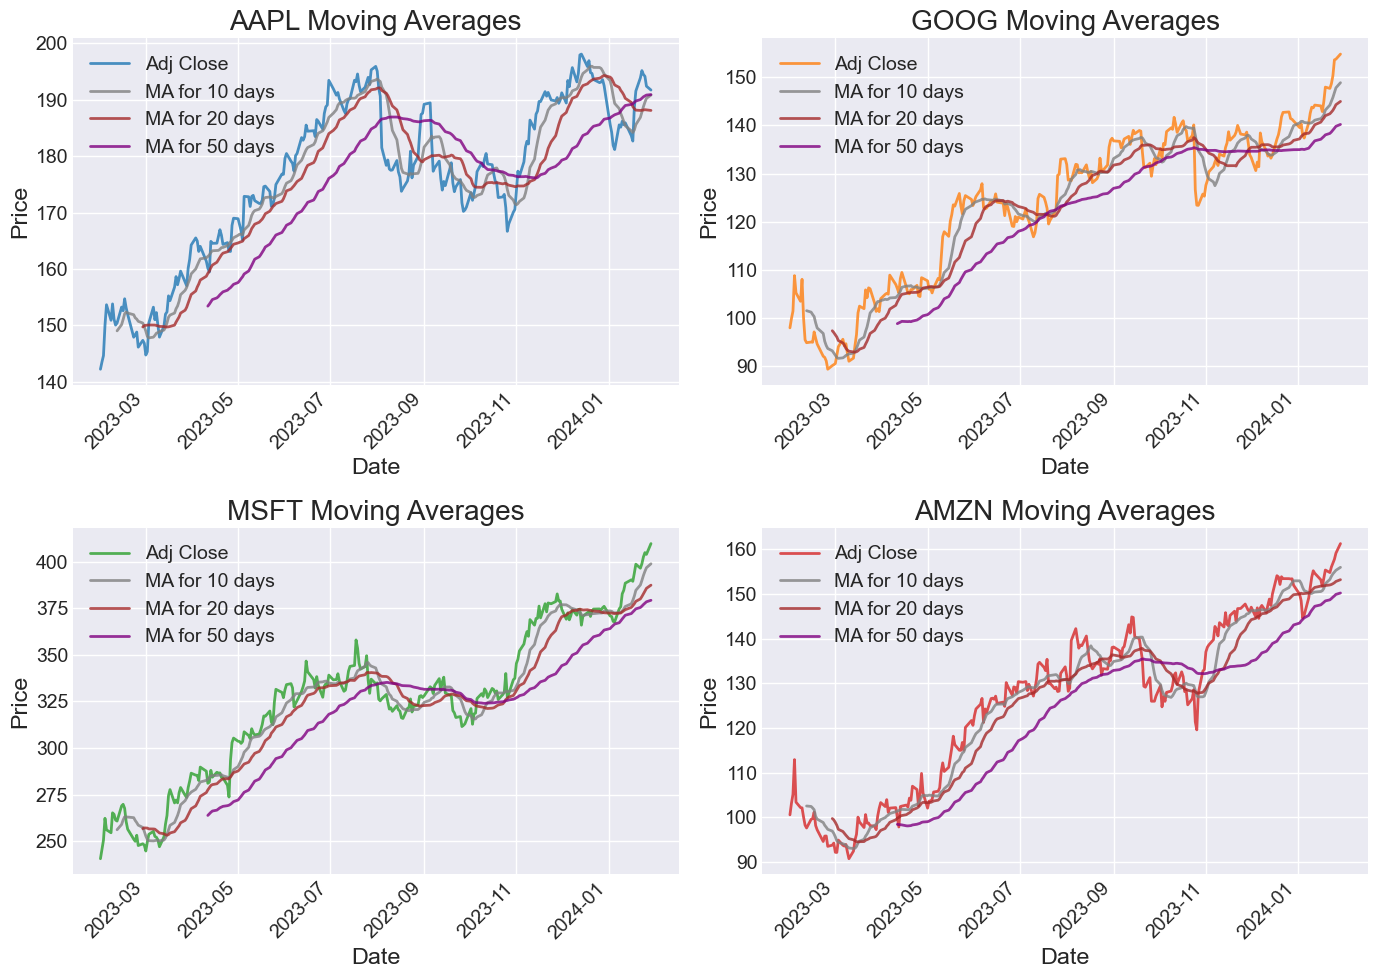

In [10]:
import matplotlib.pyplot as plt

ma_day = [10, 20, 50]

# Calculate moving averages for each company
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Create subplots for each company
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Define colors for lines
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Plot moving averages and adjusted closing prices for each company
for i, (company, tech, color) in enumerate(zip(company_list, tech_list, colors)):
    ax = axes[i // 2, i % 2]
    company[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax, linewidth=2, color=[color, 'grey', 'brown', 'purple'], alpha=0.8)
    ax.set_title(f'{tech} Moving Averages')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days'], loc='upper left')

# Adjust layout and display the plot
fig.tight_layout()
plt.show()


Based on the graph, it appears that the moving average values of 10 and 20 days effectively capture trends in the data while minimizing noise. These moving average periods strike a balance between smoothing out short-term fluctuations and retaining significant trend information.

Utilizing moving averages with these durations can provide valuable insights into the underlying trends and patterns within the stock's price movements. It enables traders and analysts to make more informed decisions by filtering out transient fluctuations and focusing on the broader market trends.

#### daily return of the stock on average
To analyze the risk of the stock, we need to examine the daily changes in the stock price, not just its absolute value. We can calculate the daily returns for the Apple stock using pandas. This involves computing the percentage change in the stock price from one day to the next.

By analyzing daily returns, we can gain insights into the volatility and risk associated with the stock. This information is crucial for investors and analysts to assess the potential rewards and risks of investing in the stock.

Let's use pandas to retrieve the daily returns for the Apple stock and further explore its risk profile.

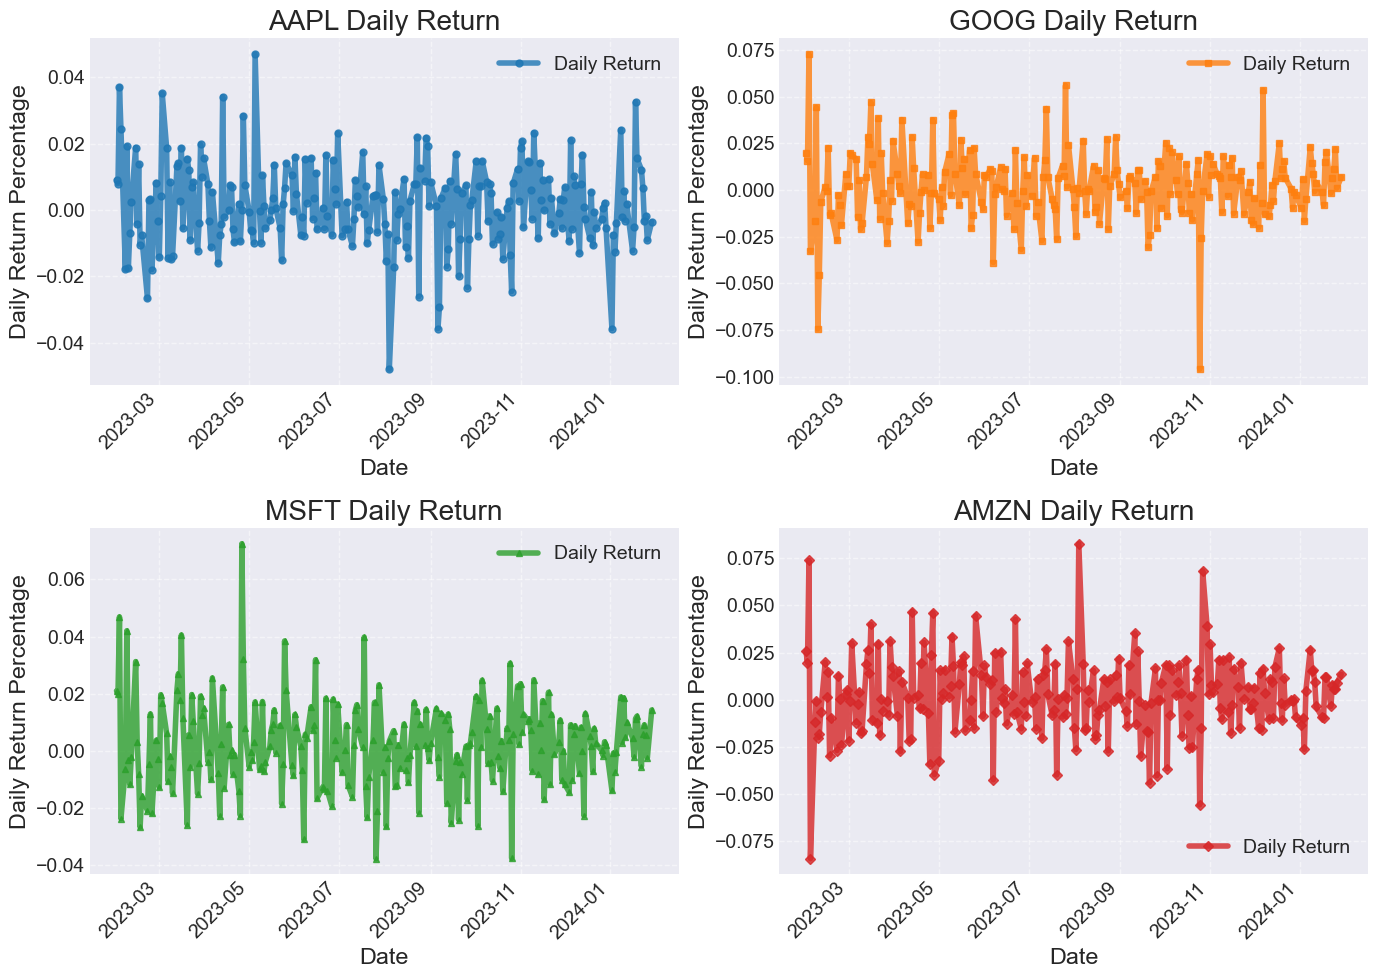

In [11]:
import matplotlib.pyplot as plt

# Calculate daily return percentage for each company
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Create subplots for each company
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Define colors and markers for each company
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
markers = ['o', 's', '^', 'D']

# Plot daily return percentage for each company
for i, (company, tech, color, marker) in enumerate(zip(company_list, tech_list, colors, markers)):
    ax = axes[i // 2, i % 2]
    company['Daily Return'].plot(ax=ax, legend=True, linestyle='-', marker=marker, color=color, markersize=5, alpha=0.8)
    ax.set_title(f'{tech} Daily Return')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Return Percentage')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

# Adjust layout and display the plot
fig.tight_layout()
plt.show()


Sure, we can create both a histogram and a kernel density estimation (KDE) plot for the average daily return using seaborn. This will provide us with a visual representation of the distribution of daily returns for the Apple stock.

Let's proceed with creating the histogram and KDE plot using seaborn to gain insights into the distribution and shape of the average daily returns.

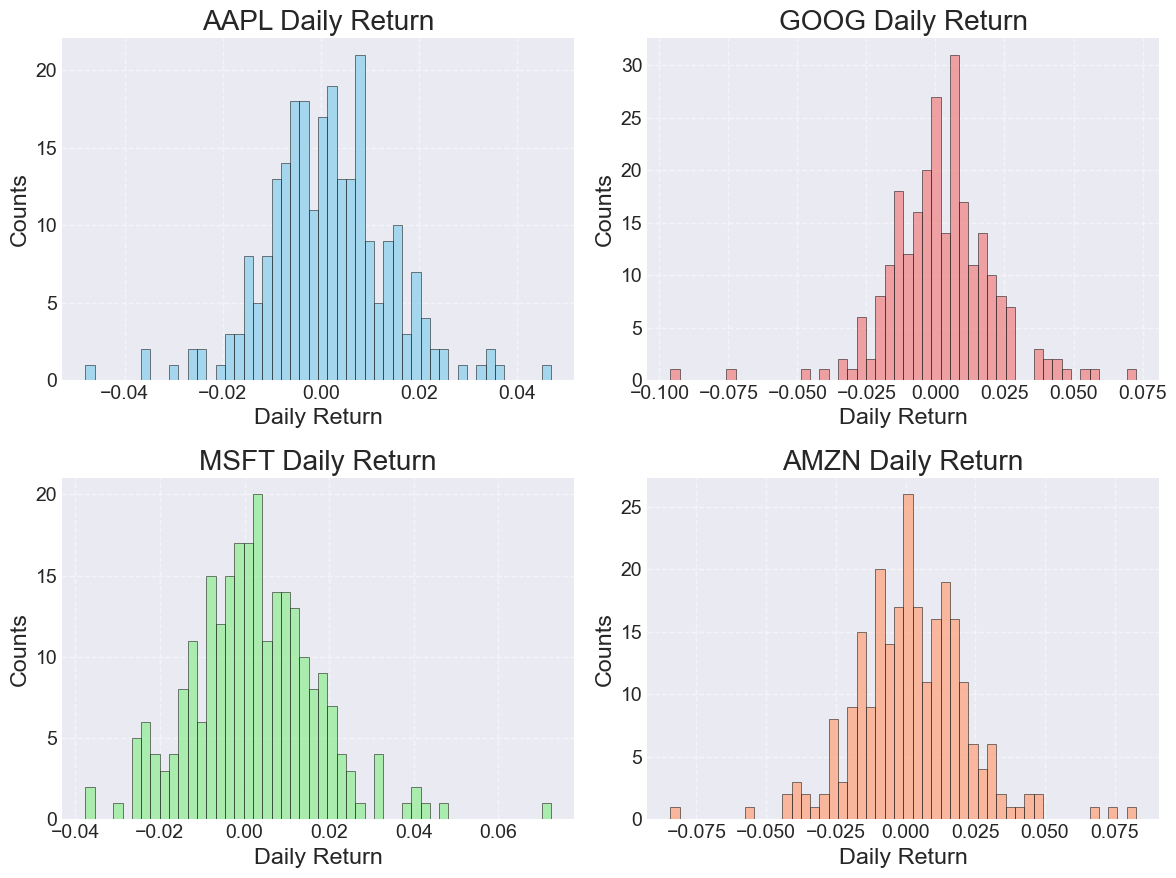

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))

# Define colors for each company
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']

for i, (company, tech, color) in enumerate(zip(company_list, tech_list, colors), 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50, color=color, edgecolor='black', alpha=0.7)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{tech} Daily Return')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


#### correlation between different stocks in closing prices
To analyze the correlation between the closing prices of different stocks, we need to compute the correlation coefficient, which measures the strength and direction of the linear relationship between two variables. The correlation coefficient ranges from -1.0 to +1.0, where:

- A value of +1.0 indicates a perfect positive correlation.
- A value of -1.0 indicates a perfect negative correlation.
- A value of 0 indicates no correlation.

It's important to note that correlation measures association but does not indicate causation or whether the association is influenced by a third factor.

To analyze the returns of all the stocks in our list, we'll create a DataFrame containing the 'Close' columns for each of the stocks' dataframes. This combined DataFrame will allow us to compute the correlation matrix and explore the relationships between the closing prices of different stocks. Let's proceed with building this DataFrame.

In [13]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

C:\Users\hasan\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\hasan\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]C:\Users\hasan\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\hasan\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-30,NaN,NaN,NaN,NaN
2023-01-31,0.009021,0.025659,0.019602,0.021013
2023-02-01,0.007901,0.019587,0.015620,0.019935
2023-02-02,0.037063,0.073799,0.072661,0.046884
2023-02-03,0.024400,-0.084315,-0.032904,-0.023621


When comparing the daily percentage return of a stock to itself, we're essentially examining the correlation between its returns on different days. This comparison helps us understand the internal consistency and volatility of the stock's price movements.

To visualize this correlation effectively, we can create a scatter plot where the x-axis represents the daily percentage return of the stock against itself, and the y-axis represents the same. This plot should ideally show a linear relationship with a correlation coefficient close to 1, indicating a strong positive correlation between the stock's returns on different days.

Let's proceed with creating the scatter plot to compare the daily percentage return of a stock to itself and analyze its correlation.

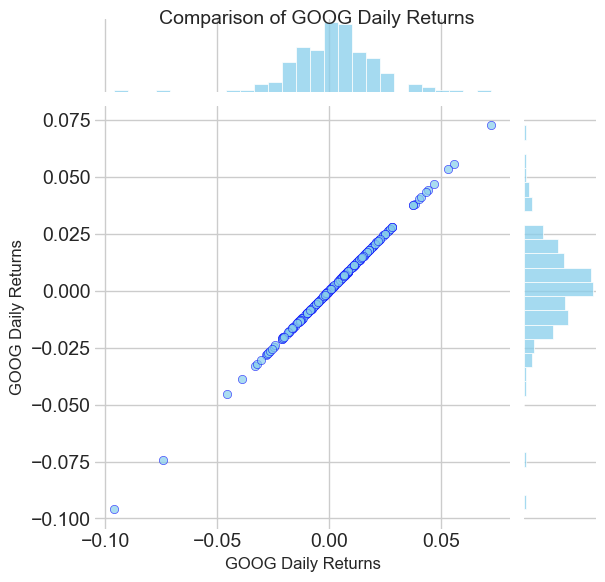

In [14]:
sns.set_style("whitegrid")

# Create a joint plot comparing Google's daily returns to itself
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='skyblue', edgecolor='blue', alpha=0.7)

# Add titles and labels
plt.xlabel('GOOG Daily Returns', fontsize=12)
plt.ylabel('GOOG Daily Returns', fontsize=12)
plt.suptitle('Comparison of GOOG Daily Returns', fontsize=14)

# Show the plot
plt.show()


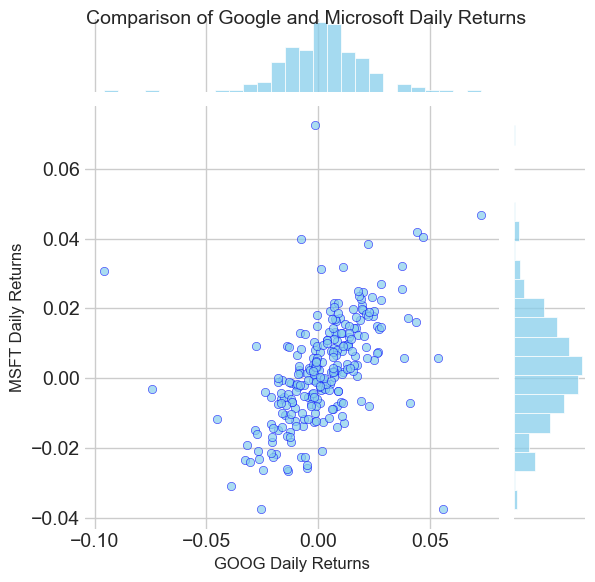

In [15]:
# Set style
sns.set_style("whitegrid")

# Create a joint plot comparing the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', color='skyblue', edgecolor='blue', alpha=0.7)

# Add titles and labels
plt.xlabel('GOOG Daily Returns', fontsize=12)
plt.ylabel('MSFT Daily Returns', fontsize=12)
plt.suptitle('Comparison of Google and Microsoft Daily Returns', fontsize=14)

# Show the plot
plt.show()


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

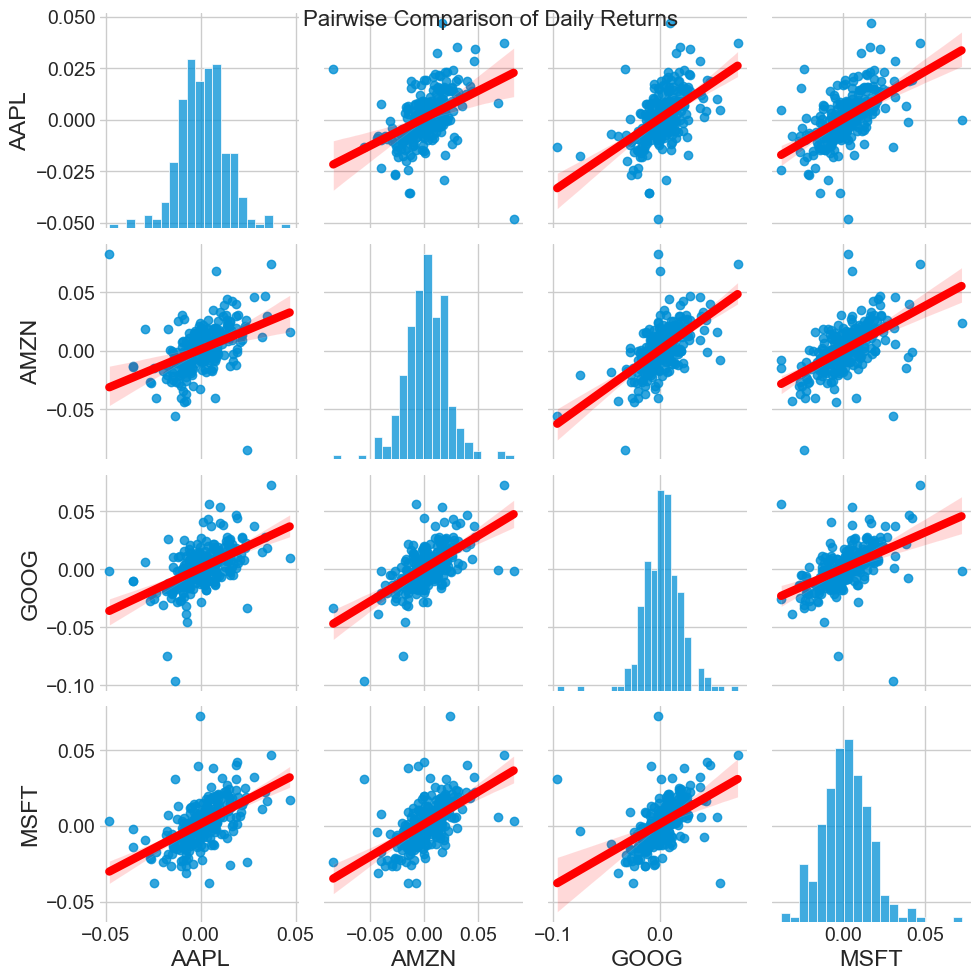

In [16]:
# Set style
sns.set_style("whitegrid")

# Create pair plot with regression lines
pair_plot = sns.pairplot(tech_rets, kind='reg', plot_kws={'line_kws':{'color':'red'}})

# Adjust labels and titles
plt.suptitle('Pairwise Comparison of Daily Returns', fontsize=16)

# Show the plot
plt.show()

The table above displays the relationships in daily returns among all the stocks. Notably, there appears to be a noteworthy correlation between Google and Amazon daily returns. Exploring this specific comparison could yield valuable insights.

Although using sns.pairplot() simplifies the process, we can also employ sns.PairGrid() for greater control over the figure. This control extends to determining the types of plots featured in the diagonal, upper triangle, and lower triangle sections. Below is an example showcasing how seaborn can be leveraged to achieve this level of customization.

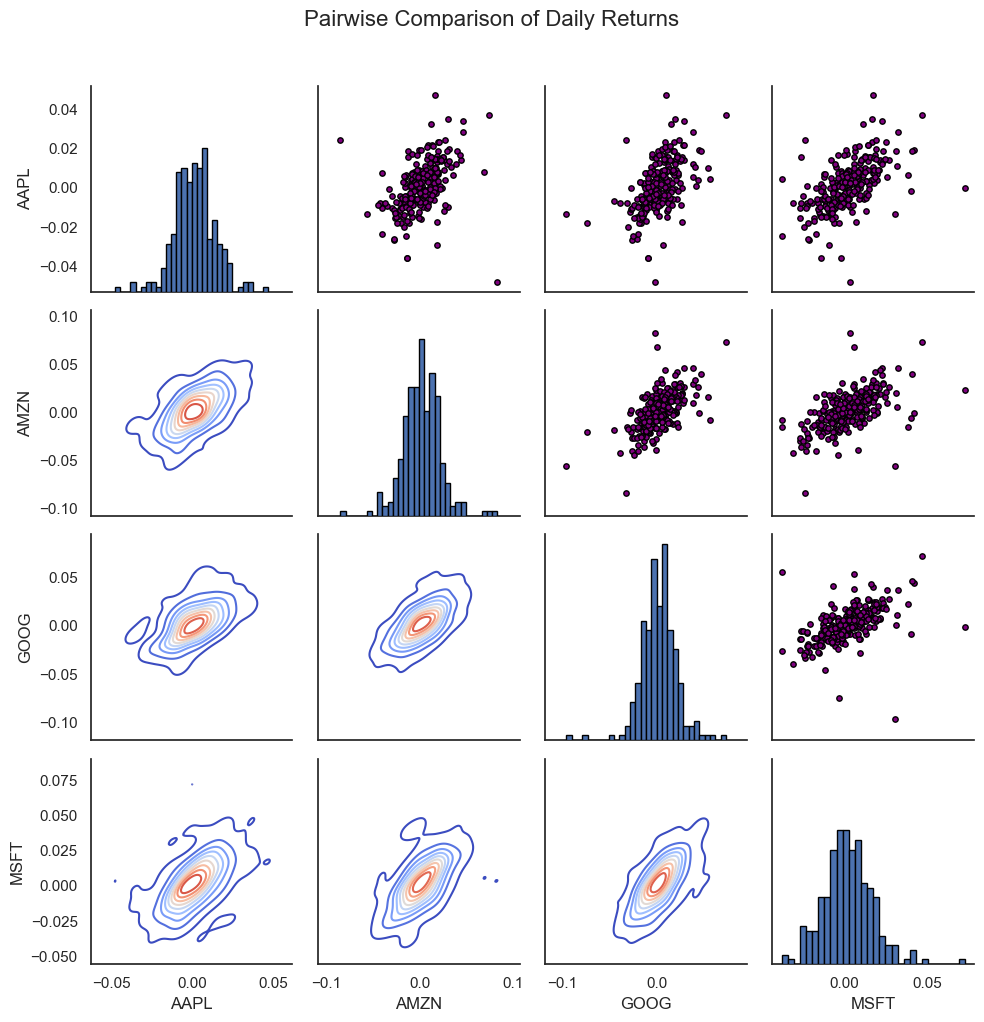

In [17]:
# Set style
sns.set(style="white")

# Set up the figure with PairGrid
return_fig = sns.PairGrid(tech_rets.dropna())

# Map the plots
return_fig.map_upper(plt.scatter, color='purple', edgecolor='black', s=15)  # Scatter plot for upper triangle
return_fig.map_lower(sns.kdeplot, cmap='coolwarm')  # Kernel density plot for lower triangle
return_fig.map_diag(plt.hist, bins=30, edgecolor='black')  # Histogram for diagonal

# Adjust title and overall layout
plt.suptitle('Pairwise Comparison of Daily Returns', fontsize=16, y=1.02)
plt.tight_layout()

# Show the plot
plt.show()

1. Upper Triangle (scatter plots): Each cell in the upper triangle represents a scatter plot of two variables against each other. It shows how the values of one variable change as the values of the other variable change. If the points form a linear pattern, it indicates a correlation between the two variables.

2. Lower Triangle (density plots or histograms): Each cell in the lower triangle represents a density plot or histogram of the distribution of values for two variables. It shows the distribution of values for each variable and allows for comparison of their shapes and spreads.

3. Diagonal (histograms or kernel density estimates): The diagonal cells represent histograms or kernel density estimates of individual variables. They show the distribution of values for each variable separately.

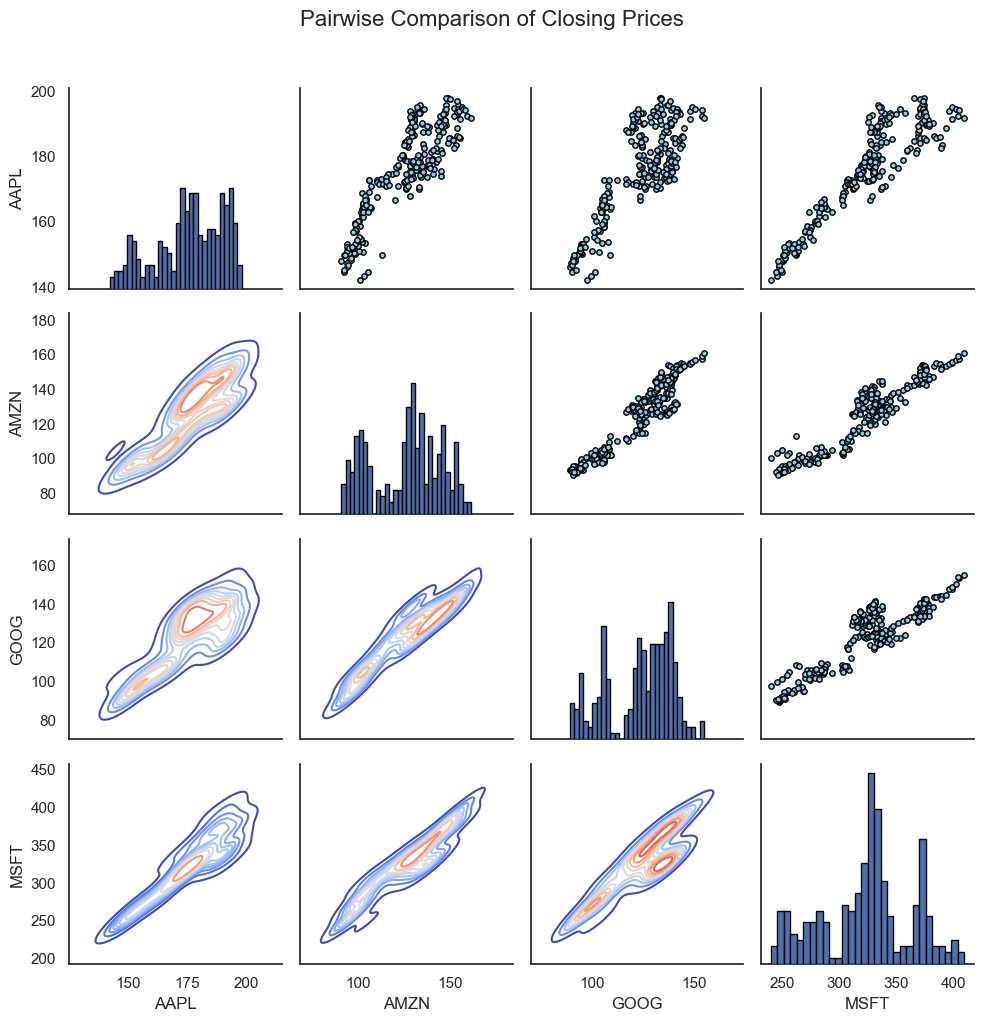

In [18]:
# Set style
sns.set(style="white")

# Set up the figure with PairGrid
returns_fig = sns.PairGrid(closing_df)

# Map the plots
returns_fig.map_upper(plt.scatter, color='skyblue', edgecolor='black', s=15)  # Scatter plot for upper triangle
returns_fig.map_lower(sns.kdeplot, cmap='coolwarm')  # Kernel density plot for lower triangle
returns_fig.map_diag(plt.hist, bins=30, edgecolor='black')  # Histogram for diagonal

# Adjust title and overall layout
plt.suptitle('Pairwise Comparison of Closing Prices', fontsize=16, y=1.02)
plt.tight_layout()

# Show the plot
plt.show()

Additionally, we can create a correlation plot to obtain precise numerical values for the correlation among the stocks' daily return values. Upon comparing the closing prices, an intriguing relationship emerges between Microsoft and Apple.

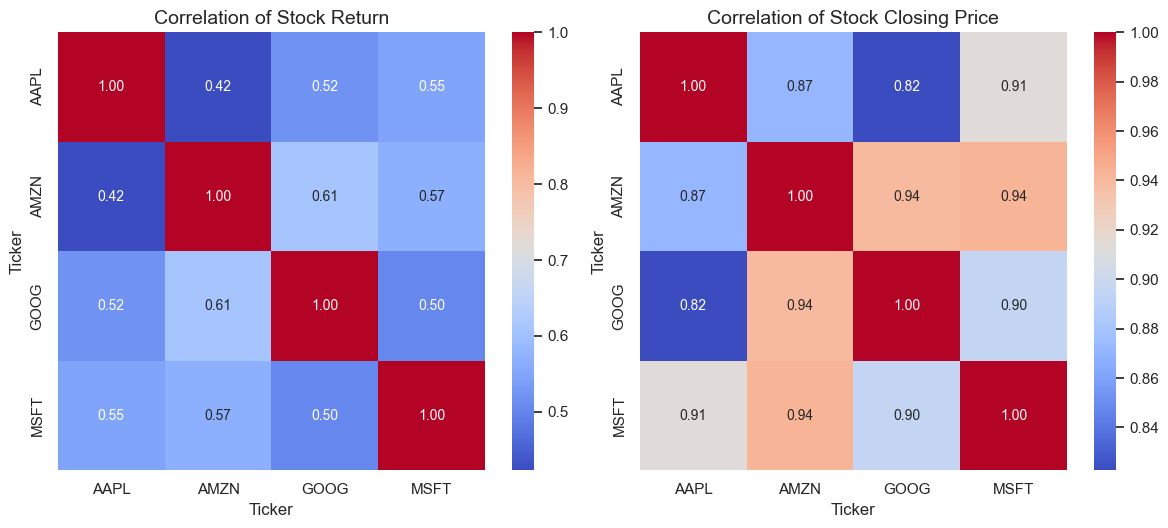

In [19]:
plt.figure(figsize=(12, 10))

# Heatmap for correlation of stock return
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation of Stock Return', fontsize=14)

# Heatmap for correlation of stock closing price
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation of Stock Closing Price', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

As suspected in our PairPlot, both numerically and visually, Microsoft and Amazon exhibit the strongest correlation in daily stock returns. Furthermore, it's intriguing to note that all the technology companies display positive correlations.

### 5. How much value do we put at risk by investing in a particular stock?

We can quantify risk in various ways, one of the simplest being by comparing the expected return with the standard deviation of the daily returns, using the information we've gathered on daily percentage returns.

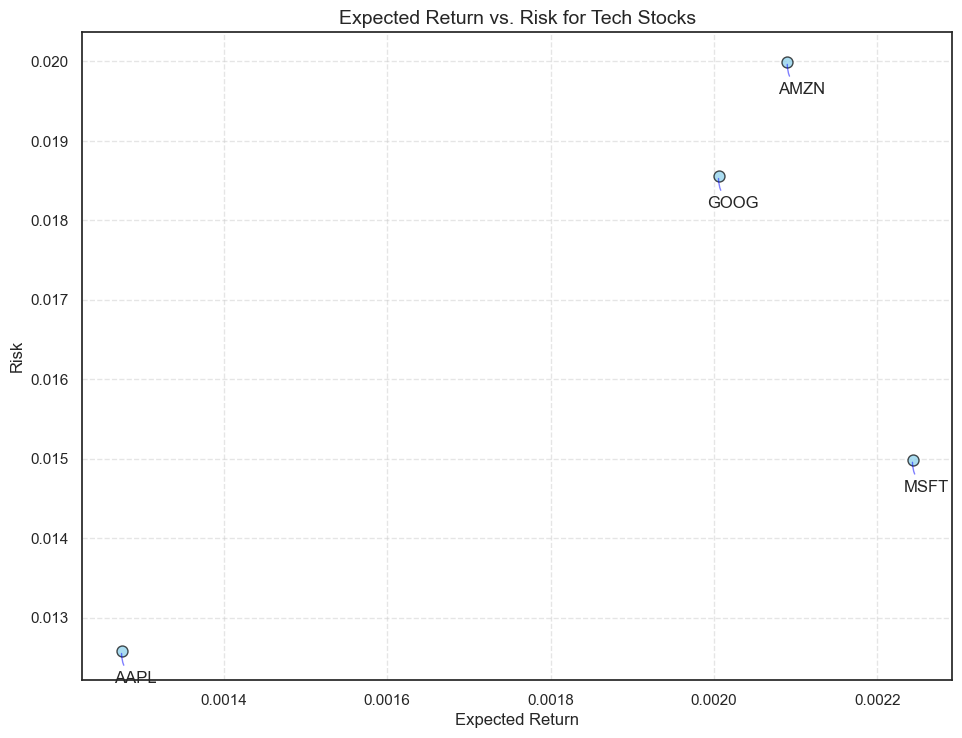

In [20]:
# Assuming rets DataFrame is defined
rets = tech_rets.dropna()

# Calculate marker sizes
area = np.pi * 20

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area, alpha=0.7, c='skyblue', edgecolors='black')

# Add labels and annotations
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(10, -20), textcoords='offset points', ha='center', va='center',
                 arrowprops=dict(arrowstyle='-', color='blue', alpha=0.5, lw=1, connectionstyle='arc3,rad=-0.3'))

# Set labels and title
plt.xlabel('Expected Return', fontsize=12)
plt.ylabel('Risk', fontsize=12)
plt.title('Expected Return vs. Risk for Tech Stocks', fontsize=14)

# Show grid
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


##### The scatter plot comparing expected return to risk for tech stocks provides a visual representation of the relationship between these two factors. Here's a simple interpretation:

1. Expected Return: This represents the average return that investors might expect to receive from investing in a particular tech stock over a given period.

2. Risk: This measures the volatility or uncertainty associated with the returns of the stock. A higher level of risk indicates that the returns of the stock are more unpredictable.

##### In the scatter plot:

Each point represents a tech stock.
The position of a point on the plot indicates the average return and the level of risk associated with that stock.
Points positioned higher on the y-axis represent stocks with higher levels of risk.
Points positioned farther to the right on the x-axis represent stocks with higher expected returns.
The scatter plot allows you to visually compare different tech stocks based on their expected return and risk level.
Ideally, investors seek stocks that offer higher expected returns with lower levels of risk, which would be represented by points positioned higher on the x-axis and lower on the y-axis.

# LSTM Time Series Forecasting Tutorial

In this tutorial, we will explore how to use LSTM neural networks for time series forecasting. LSTM networks are powerful models capable of learning and capturing long-term dependencies in sequential data, making them well-suited for time series prediction tasks.

## What is LSTM?

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) architecture designed to overcome the limitations of traditional RNNs in capturing long-term dependencies. Unlike standard RNNs, LSTM networks incorporate memory cells and gating mechanisms that enable them to learn and remember information over longer time horizons.

## Dataset

For this tutorial, we will use a time series dataset that represents historical stock prices. The dataset contains daily stock price data, including opening price, closing price, highest price (high), lowest price (low), and trading volume.

## Loading and Preprocessing Data

1. Load the dataset: Use pandas to load the time series data from a CSV file.
2. Preprocess the data: Prepare the data by converting it into a suitable format for training the LSTM model. This may involve scaling the data, splitting it into training and testing sets, and reshaping it as needed.

## Building the LSTM Model

1. Import necessary libraries: Import TensorFlow or Keras, the high-level deep learning library, for building and training the LSTM model.
2. Define the LSTM architecture: Design the LSTM model architecture, specifying the number of LSTM layers, the number of units in each layer, activation functions, and other parameters.
3. Compile the model: Configure the model for training by specifying the optimizer, loss function, and evaluation metrics.
4. Train the model: Fit the model to the training data, specifying the batch size, number of epochs, and any callbacks for monitoring training progress.

## Evaluating Model Performance

1. Evaluate the model: Assess the performance of the trained LSTM model on the testing data using appropriate evaluation metrics such as mean squared error (MSE) or mean absolute error (MAE).
2. Visualize predictions: Plot the actual and predicted values of the time series data to visually inspect how well the model captures the underlying patterns and trends.

## Conclusion

In this tutorial, we learned how to implement an LSTM neural network for time series forecasting using stock price data as an example. LSTM networks offer a powerful framework for modeling sequential data and are widely used in various domains, including finance, healthcare, and natural language processing.

By leveraging the capabilities of LSTM networks, we can build accurate and reliable models for predicting future values in time series data, enabling us to make informed decisions and forecasts in real-world applications.


### 6. Predicting the closing price stock price of APPLE

In [21]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

C:\Users\hasan\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449689,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516596,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655555,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787854,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767573,394024400
...,...,...,...,...,...,...
2024-01-23,195.020004,195.750000,193.830002,195.179993,195.179993,42355600
2024-01-24,195.419998,196.380005,194.339996,194.500000,194.500000,53631300
2024-01-25,195.220001,196.270004,193.110001,194.169998,194.169998,54822100


In [22]:
import plotly.graph_objs as go

# Create a trace for the close price data
trace_close = go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price')

# Create layout for the plot
layout = go.Layout(
    title='Close Price History',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Close Price USD ($)'),
    hovermode='x'  # Set hover mode to show information on closest data point
)

# Combine trace and layout into a figure
fig = go.Figure(data=[trace_close], layout=layout)

# Show the interactive plot
fig.show()


In [23]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2886

The output "2886" represents the number of data points that will be used for training the machine learning model.

In the context of the code snippet provided, the variable training_data_len is calculated to ensure that approximately 95% of the total dataset will be used for training the model.

This means that out of the entire dataset, 95% of the data points, which in this case is 2886, will be used to train the machine learning model. The remaining data points, approximately 5%, may be used for testing, validation, or other purposes depending on the specific requirements of the machine learning task.

In [24]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.97860584],
       [0.96910336],
       [0.96535666]])

The Min-Max scaling process ensures that all the values in the dataset are scaled proportionally to fit within the specified range (0 to 1), which can help improve the performance of machine learning algorithms, especially those sensitive to the scale of the input features.

In [25]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)





2826/2826 [==============================] - 38s 12ms/step - loss: 0.0013


In [27]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 19ms/step


4.89138897349623

The output you've obtained, 4.89138897349623, represents the root mean squared error (RMSE) between the predicted price values and the actual price values in testing dataset.

Here's what this analysis means:

Root Mean Squared Error (RMSE): RMSE is a measure of the differences between predicted values and actual values. It's a common metric used to evaluate the performance of regression models, including forecasting models like the one you've built.

Interpretation of RMSE: In this context, an RMSE of 4.89138897349623 suggests that, on average, the predicted price values from model differ from the actual price values by approximately $4.89.

Model Evaluation: A lower RMSE indicates better performance of the model, as it means that the model's predictions are closer to the actual values. However, the interpretation of RMSE also depends on the scale of the target variable. In your case, the RMSE suggests that the model's predictions are relatively close to the actual prices.

Further Considerations: While RMSE provides a useful measure of prediction accuracy, it's important to consider it in the context of  specific application and compare it with alternative models or baseline methods to assess the model's effectiveness.

Overall, an RMSE of 4.89138897349623 suggests that your LSTM model is providing reasonably accurate predictions, but further analysis and evaluation may be needed to fully assess its performance and suitability for forecasting task.

In [30]:
import plotly.graph_objs as go

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Create traces for the data
trace_train = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
trace_valid_close = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Valid')
trace_predictions = go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions')

# Create layout for the plot
layout = go.Layout(
    title='Model',
    xaxis=dict(title='Date', tickformat='%Y-%m-%d'),
    yaxis=dict(title='Close Price USD ($)'),
    hovermode='x',
    legend=dict(x=0.02, y=0.98)
)

# Combine traces and layout into a figure
fig = go.Figure(data=[trace_train, trace_valid_close, trace_predictions], layout=layout)

# Add option for range slider and buttons
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show the plot
fig.show()


C:\Users\hasan\AppData\Local\Temp\ipykernel_832\411035656.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-06-23,186.679993,182.167709
2023-06-26,185.270004,182.600967
2023-06-27,188.059998,182.755875
2023-06-28,189.250000,183.196152
2023-06-29,189.589996,183.850128
...,...,...
2024-01-23,195.179993,185.256104
2024-01-24,194.500000,187.004364
2024-01-25,194.169998,188.420456


In [33]:
import plotly.graph_objs as go

# Create traces for valid and predicted prices
trace_valid = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Valid Close Prices')
trace_predicted = go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predicted Prices')

# Define data and layout for the plot
data = [trace_valid, trace_predicted]
layout = go.Layout(title='Valid vs. Predicted Prices',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price (USD)'),
                   hovermode='x')  # Enable x-axis hover

# Create figure and plot the data
fig = go.Figure(data=data, layout=layout)
fig.show()


### 6. Predicting the closing price stock price of MSFT

In [34]:
# Get the stock quote
df = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
# Show teh data
df

C:\Users\hasan\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.278027,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.778776,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.001343,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.343121,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.049028,59706800
...,...,...,...,...,...,...
2024-01-23,395.750000,399.380005,393.929993,398.899994,398.899994,20525900
2024-01-24,401.540009,405.630005,400.450012,402.559998,402.559998,24867000
2024-01-25,404.320007,407.010010,402.529999,404.869995,404.869995,21021200


In [35]:
import plotly.graph_objs as go

# Create a trace for the close price data
trace_High = go.Scatter(x=df.index, y=df['High'], mode='lines', name='High Price')

# Create layout for the plot
layout = go.Layout(
    title='High Price History',
    xaxis=dict(title='Date'),
    yaxis=dict(title='High Price USD ($)'),
    hovermode='x'  # Set hover mode to show information on closest data point
)

# Combine trace and layout into a figure
fig = go.Figure(data=[trace_High], layout=layout)

# Show the interactive plot
fig.show()


In [36]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['High'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2886

In [37]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[8.60831912e-04],
       [2.19120941e-03],
       [2.86944137e-03],
       ...,
       [9.92252508e-01],
       [9.90061308e-01],
       [1.00000000e+00]])

In [38]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00086083, 0.00219121, 0.00286944, 0.00406939, 0.00383462,
       0.00396505, 0.00352159, 0.00362593, 0.00422591, 0.00526934,
       0.00461719, 0.00472154, 0.00811269, 0.0086605 , 0.00766923,
       0.00787792, 0.00800835, 0.00756489, 0.00779967, 0.00800835,
       0.00892135, 0.00923438, 0.00983436, 0.00936481, 0.01006913,
       0.01053867, 0.01087779, 0.01087779, 0.01079953, 0.00999087,
       0.00980827, 0.01283422, 0.01223425, 0.01299074, 0.01317334,
       0.01293857, 0.0127038 , 0.0127038 , 0.01382549, 0.01400809,
       0.01502543, 0.01515586, 0.01413852, 0.01395592, 0.0137994 ,
       0.01455589, 0.01442546, 0.01452981, 0.01580801, 0.01630364,
       0.01646015, 0.01648624, 0.01559933, 0.01439938, 0.01439938,
       0.01424286, 0.01429503, 0.01559933, 0.0158341 , 0.0158341 ])]
[0.014503715389142566]

[array([0.00086083, 0.00219121, 0.00286944, 0.00406939, 0.00383462,
       0.00396505, 0.00352159, 0.00362593, 0.00422591, 0.00526934,
       0.00461719, 0.00472154, 0.0

In [47]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2826/2826 [==============================] - 38s 12ms/step - loss: 9.9027e-04


In [51]:
import plotly.graph_objs as go

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Create traces for the data
trace_train = go.Scatter(x=train.index, y=train['High'], mode='lines', name='Train')
trace_valid_close = go.Scatter(x=valid.index, y=valid['High'], mode='lines', name='Valid')
trace_predictions = go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions')

# Create layout for the plot
layout = go.Layout(
    title='Model',
    xaxis=dict(title='Date', tickformat='%Y-%m-%d'),
    yaxis=dict(title='Close Price USD ($)'),
    hovermode='x',
    legend=dict(x=0.02, y=0.98)
)

# Combine traces and layout into a figure
fig = go.Figure(data=[trace_train, trace_valid_close, trace_predictions], layout=layout)

# Add option for range slider and buttons
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show the plot
fig.show()


C:\Users\hasan\AppData\Local\Temp\ipykernel_832\2537936136.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. The x-axis represents dates.
2. The y-axis represents prices in USD.
3. Blue lines represent the actual valid close prices.
4. Orange lines represent the predicted prices.

### Summary
In this notebook, we embarked on a journey of exploring stock data, gaining insights into the dynamic world of financial markets. Here's a breakdown of what we learned:

1. Data Acquisition: We discovered how to retrieve stock market data from the YAHOO Finance website using the powerful yfinance library. This step laid the foundation for our analysis, providing access to historical stock prices and related metrics.

2. Data Exploration and Visualization: Armed with the data, we delved into exploratory data analysis using Pandas, Matplotlib, and Seaborn. Through these tools, we visualized time-series data, identifying trends, patterns, and anomalies. Visualization techniques such as line plots, histograms, and scatter plots empowered us to interpret the behavior of stock prices over time.

3. Correlation Analysis: Understanding the interplay between different stocks is crucial for informed decision-making. We learned how to measure the correlation between stocks, uncovering relationships and dependencies within the market. By examining correlation matrices and visualizing pairwise relationships, we gained insights into how stocks move in relation to one another.

4. Risk Assessment: Investing inherently involves risk, and quantifying this risk is essential for portfolio management. We explored fundamental measures of risk, such as comparing expected returns with the standard deviation of daily returns. This analysis provided a framework for evaluating the risk-return tradeoff associated with investing in specific stocks.

By mastering these concepts and techniques, we've equipped ourselves with valuable tools for navigating the complexities of financial markets. Our newfound knowledge opens doors to further exploration and analysis, empowering us to make informed decisions in the dynamic world of finance.